# <center> Author: Tianjian Che


Starting from state $i$, denote $f^{(n)}_{ij}$ as the probability that the discrete time Markov chain (DTMC) arrives at state $j$ for the first time exactly after $n$ steps, that is:

$$
f^{(n)}_{ij} = P\big( X_{1} \neq j, X_{2} \neq j, \ldots, X_{n-1} \neq j, X_{n} =j ~ | ~ X_{0} =i \big)
$$

Naturally, we have:

$$
f_{ij} = \sum\limits^{\infty}_{n=1} f_{ij}^{(n)}
$$

be the probability that started from state $i$ and the DTMC finally arrives at state $j$ after some steps, and we have $f_{ij} \leq 1$ by the law of total probability.

Here it comes the definitions of **recurrent state** and **transient state**:

A state $i$ is called **recurrent** if: 

$$
P\big( X_{n} = i \mbox{ for some } n \geq 1 ~ | ~ X_{0} = i \big) = 1
$$

and state $i$ is called **transient** if:

$$
P\big( X_{n} = i \mbox{ for some } n \geq 1 ~ | ~ X_{0} = i \big) < 1
$$

The above two mathematical definitions cannot be further intuitive and obvious. A **recurrent state** $i$ means that, the DTMC which started from state $i$ can always return to itself ($i$) for probability $1$, it further indicates that the DTMC will visit state $i$ for infinitely many times. By definition above we know that in this case: $f_{ii} = 1$.

Similarly, a **transient state** $i$ means that, started from state $i$, there exists a strictly positive probability (which is therefore $1 - f_{ii} > 0$) that the DTMC will never come back again. Hence, the DTMC will "hit on" this probability as long as it's strictly positive given a sufficiently long but finite time. In other words, sooner or later, the DTMC will leave from state $i$ and never come back again. In this case, the expected number of returns to state $i$ is also a finite and can be derived as following:

$$
\begin{align*}
S & = 1 \cdot f_{ii} \cdot (1-f_{ii})  + 2 \cdot (f_{ii})^{2} \cdot (1-f_{ii}) + 3 \cdot (f_{ii})^{3} \cdot (1-f_{ii}) + \cdots\\
f_{ii} S & = (f_{ii})^{2} \cdot (1-f_{ii}) + 2 \cdot (f_{ii})^{3} \cdot (1-f_{ii}) + 3 \cdot (f_{ii})^{4} \cdot (1-f_{ii}) + \cdots\\
(1-f_{ii}) S & = f_{ii} \cdot (1-f_{ii}) + (f_{ii}) ^{2} \cdot (1-f_{ii}) + (f_{ii})^{3} \cdot (1-f_{ii}) + \cdots\\
S & = \lim\limits_{n \rightarrow \infty}\frac{f_{ii}\big( 1 - (f_{ii})^{n} \big)}{1 - f_{ii}} = \frac{f_{ii}}{1 - f_{ii}}
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(66)
actual = []
for p in np.linspace(0.1, 0.9, 81):  # denote as f_ii
    count = 0
    for n in range(10000):
        while np.random.uniform(0, 1) <= p:
            count += 1
    count = count / 10000
    actual.append(count)

theoretical = list(map(lambda p: p/(1-p), np.linspace(0.1, 0.9, 81)))

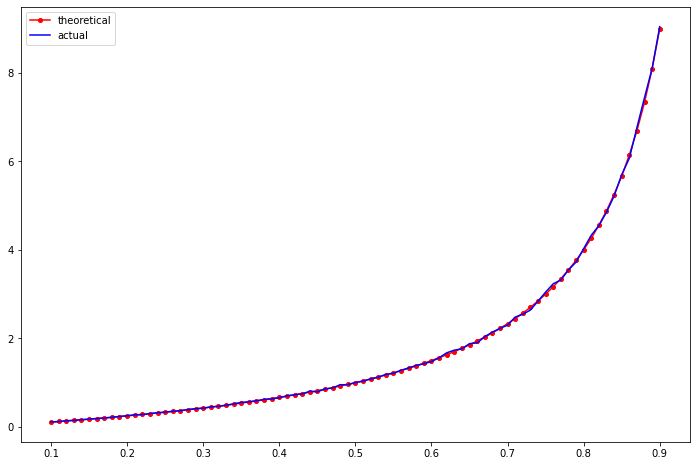

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(0.1, 0.9, 81), theoretical, color="red", marker="o", label="theoretical", markersize=4)
plt.plot(np.linspace(0.1, 0.9, 81), actual, "b", label="actual")
plt.legend()
plt.show()